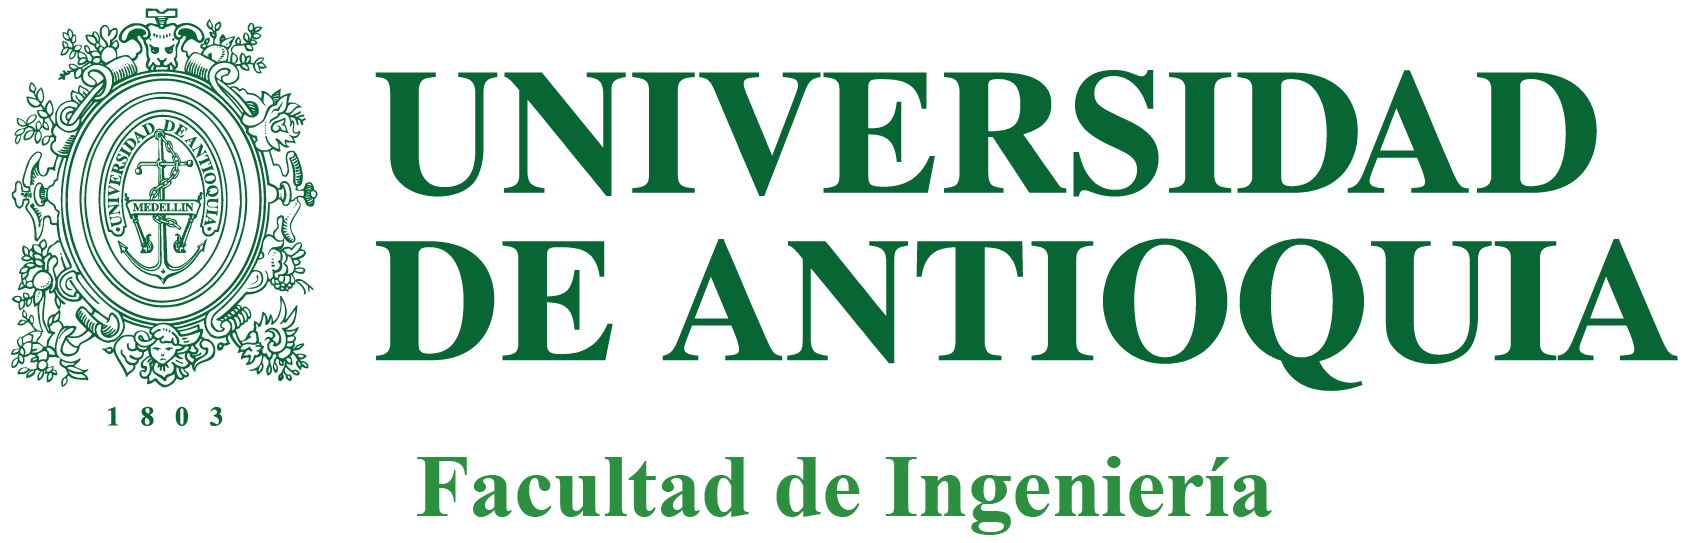

# <font color='2d9040'>**Proyecto final.**</font>
## Estudiantes:
 - Omar Acevedo.
 - Sofía Raigosa.
 - Juan Esteban Pineda Lopera.



## Objetivo.
---
Fortalecer las destrezas de los estudiantes en el modelado de fenómenos fisiológicos aprendiendo a identificar sistemas lineales mediante técnicas paramétricas y realizando estudios en tiempo y frecuencia sobre los sistemas identificados mediante herramientas de simulación en Python.

## Marco teórico.
---
Las señales respiratorias, como el flujo, la presión y el volumen, se ven directamente influenciadas por parámetros mecánicos del sistema respiratorio, tales como la resistencia de las vías aéreas, la distensibilidad (o compliance) pulmonar y la inercia de los tejidos y del aire en movimiento. Estas características varían entre sujetos por la variabilidad biológica y cambios en cualquiera de estos parámetros alteran tanto la amplitud como la forma temporal de las señales registradas, reflejando adaptaciones fisiológicas o la presencia de alteraciones patológicas. Es por esto que la medición y caracterización de
estos parámetros se ha vuelto de interés médico y científico.

## Experimento.
---
Usted y su grupo de trabajo han registrado el flujo en la vía aérea (L/s) y el volumen de aire (mL) de dos voluntarios diferentes, el primero sano y el segundo con una patología relacionada con el aumento de la distensibilidad pulmonar. Con estos datos (ver detalles en la Tabla 1) se pretende definir un modelo estructural adecuado que permita relacionar las señales de flujo y volumen e identificar los valores de los parámetros que lo caracterizan para
los dos sujetos.



| Voluntario |    | Datos disponibles en el archivo comprimido | Abreviatura |
|------------|----|--------------------------------------------|-------------|
| Sujeto 1   | data1 |Señal de entrada                        | u1          |
|            |        |Señal de salida                         | y1          |
|            |        |Señal de tiempo                         | t1          |
|            | datav |Señal de entrada validación             | uv          |
|            |        |Señal de salida de validación           | yv          |
|            |        |Señal de tiempo para datos validación   | tv          |
| Sujeto 2   | data2 |Señal de entrada                        | u2          |
|            |        |Señal de salida                         | y2          |
|            |        |Señal de tiempo                         | t2          |
**Tabla 1.** Conjunto de señales almacenadas para dos voluntarios diferentes.


# Actividades.

## Configuración inicial.

In [2]:
# Instalar las librerias que no estén por defecto.
%pip install rarfile
%pip install pysid

In [3]:
# Importar las librerias necesarias.
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.signal as signal

from scipy.signal import dlti, dlsim
from pysid import bj, armax, oe, arma, ar, arx
from scipy.fft import fft, fftfreq
from rarfile import RarFile
from scipy.signal import find_peaks, dlti, dlsim

from scipy.signal import TransferFunction, lsim
from scipy.optimize import minimize
from pysid import oe, armax, bj, arx
from scipy.signal import dlti, dlsim
from scipy.signal import detrend
from scipy.signal import freqz
from scipy.signal import lfilter
from numpy import roots
from scipy import signal

In [6]:
# Carga de los datos (SI SE ESTÁ USANDO GOOGLE COLAB)
# Link en drive: https://drive.google.com/file/d/1gJ7MM9c7mLbzDGH0mhMmvnEboURtrSYt/view?usp=sharing
file_id = '1gJ7MM9c7mLbzDGH0mhMmvnEboURtrSYt'
destination = 'E1.rar'

if not os.path.exists(destination):
    print(f"El archivo '{destination}' no encontrado. Descargando...")
    !gdown --id {file_id} --output {destination}
else:
    print(f"El archivo '{destination}' ya está descargado.")

# Extracción del archivo compromido en una carpeta llamada "data"
extract_to = "data"

if not os.path.exists(extract_to) or not os.listdir(extract_to):
    print(f"Extrayendo contenido a '{extract_to}'...")

    with RarFile(destination) as rar_ref:
        rar_ref.extractall(path=extract_to)
else:
    print(f"Los archivos ya fueron extraídos en '{extract_to}'.")

El archivo 'E1.rar' no encontrado. Descargando...
/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1gJ7MM9c7mLbzDGH0mhMmvnEboURtrSYt
To: /content/E1.rar
100% 1.75M/1.75M [00:00<00:00, 137MB/s]
Extrayendo contenido a 'data'...


In [7]:
# Se cargan los datos
data1 = pd.read_csv('data/data1.csv')
data2 = pd.read_csv('data/data2.csv')
datav = pd.read_csv('data/datav.csv')

print(' Data 1 '.center(60, '-'))
display(data1)

print(' Data 2 '.center(60, '-'))
display(data2)

print(' Data v '.center(60, '-'))
display(datav)

-------------------------- Data 1 --------------------------


,u1,y1,t1
0,0.174016,179.858477,0.000000
1,0.173388,179.705891,0.000977
2,0.172760,179.553305,0.001953
3,0.172132,179.400719,0.002930
4,0.171504,179.248133,0.003906
...,...,...,...
23853,-6.223351,124.321672,23.293647
23854,-6.220344,124.779430,23.294624
23855,-6.217336,125.237187,23.295600
23856,-6.214328,125.694945,23.296577


-------------------------- Data 2 --------------------------


,u2,y2,t2
0,-3.233458,25.229344,0.000000
1,-3.240742,25.534516,0.000977
2,-3.248027,25.839687,0.001953
3,-3.255312,26.144859,0.002930
4,-3.262596,26.450031,0.003906
...,...,...,...
29817,-1.568925,10.509785,29.117791
29818,-1.579390,10.586078,29.118768
29819,-1.589854,10.662371,29.119744
29820,-1.600318,10.738664,29.120721


-------------------------- Data v --------------------------


,uv,yv,tv
0,1.142349,157.444266,0.000000
1,1.146115,157.367973,0.000977
2,1.149880,157.291680,0.001953
3,1.153646,157.215387,0.002930
4,1.157412,157.139094,0.003906
...,...,...,...
38764,-10.103499,147.381875,37.854984
38765,-10.112448,147.710672,37.855961
38766,-10.120170,148.015844,37.856937
38767,-10.127893,148.321016,37.857914


In [8]:
# Vector de tiempo (se toma el vector de tiempo más corto)
t = np.array(data1.t1)
Ts = np.mean(np.diff(t))
print(f'Periodo de muestreo: {Ts}')

# Vectores de salida (y1) y entrada (u1) del sujeto 1 para construcción.
u1 = np.array(data1.u1)
y1 = np.array(data1.y1)

# Vectores de salida (y2) y entrada (u2) del sujeto 2.
# Se limita el tamaño al largo del vector de tiempo.
u2 = np.array(data2.u2)[:len(t)]
y2 = np.array(data2.y2)[:len(t)]

# Vectores de salida (yv) y entrada (uv) para validación.
# Se limita el tamaño al largo del vector de tiempo.
uv = np.array(datav.uv)[:len(t)]
yv = np.array(datav.yv)[:len(t)]

Periodo de muestreo: 0.0009765500000000001


## 1. Identificación del sistema usando técnicas paramétricas.
---
Identifique el sistema haciendo uso de las señales de entrada y salida del sujeto 1 utilizando las estructuras paramétricas vistas en clase (AR, ARX, ARMA, OE, BJ, ARMAX). Seleccione la estructura y el orden que considere adecuado, presentando la debida justificación. Haga uso de las señales de validación para soportar su elección.

Consideraciones:

**a)**. Realice el preprocesado que considere necesario.

**b)**. Debe seleccionar un orden que permita obtener una estructura con más de 4 parámetros.

**c)**. Presente la ecuación final del modelo que describe la relación entre el flujo y el volumen para el sujeto 1.


### Visualización de los datos.

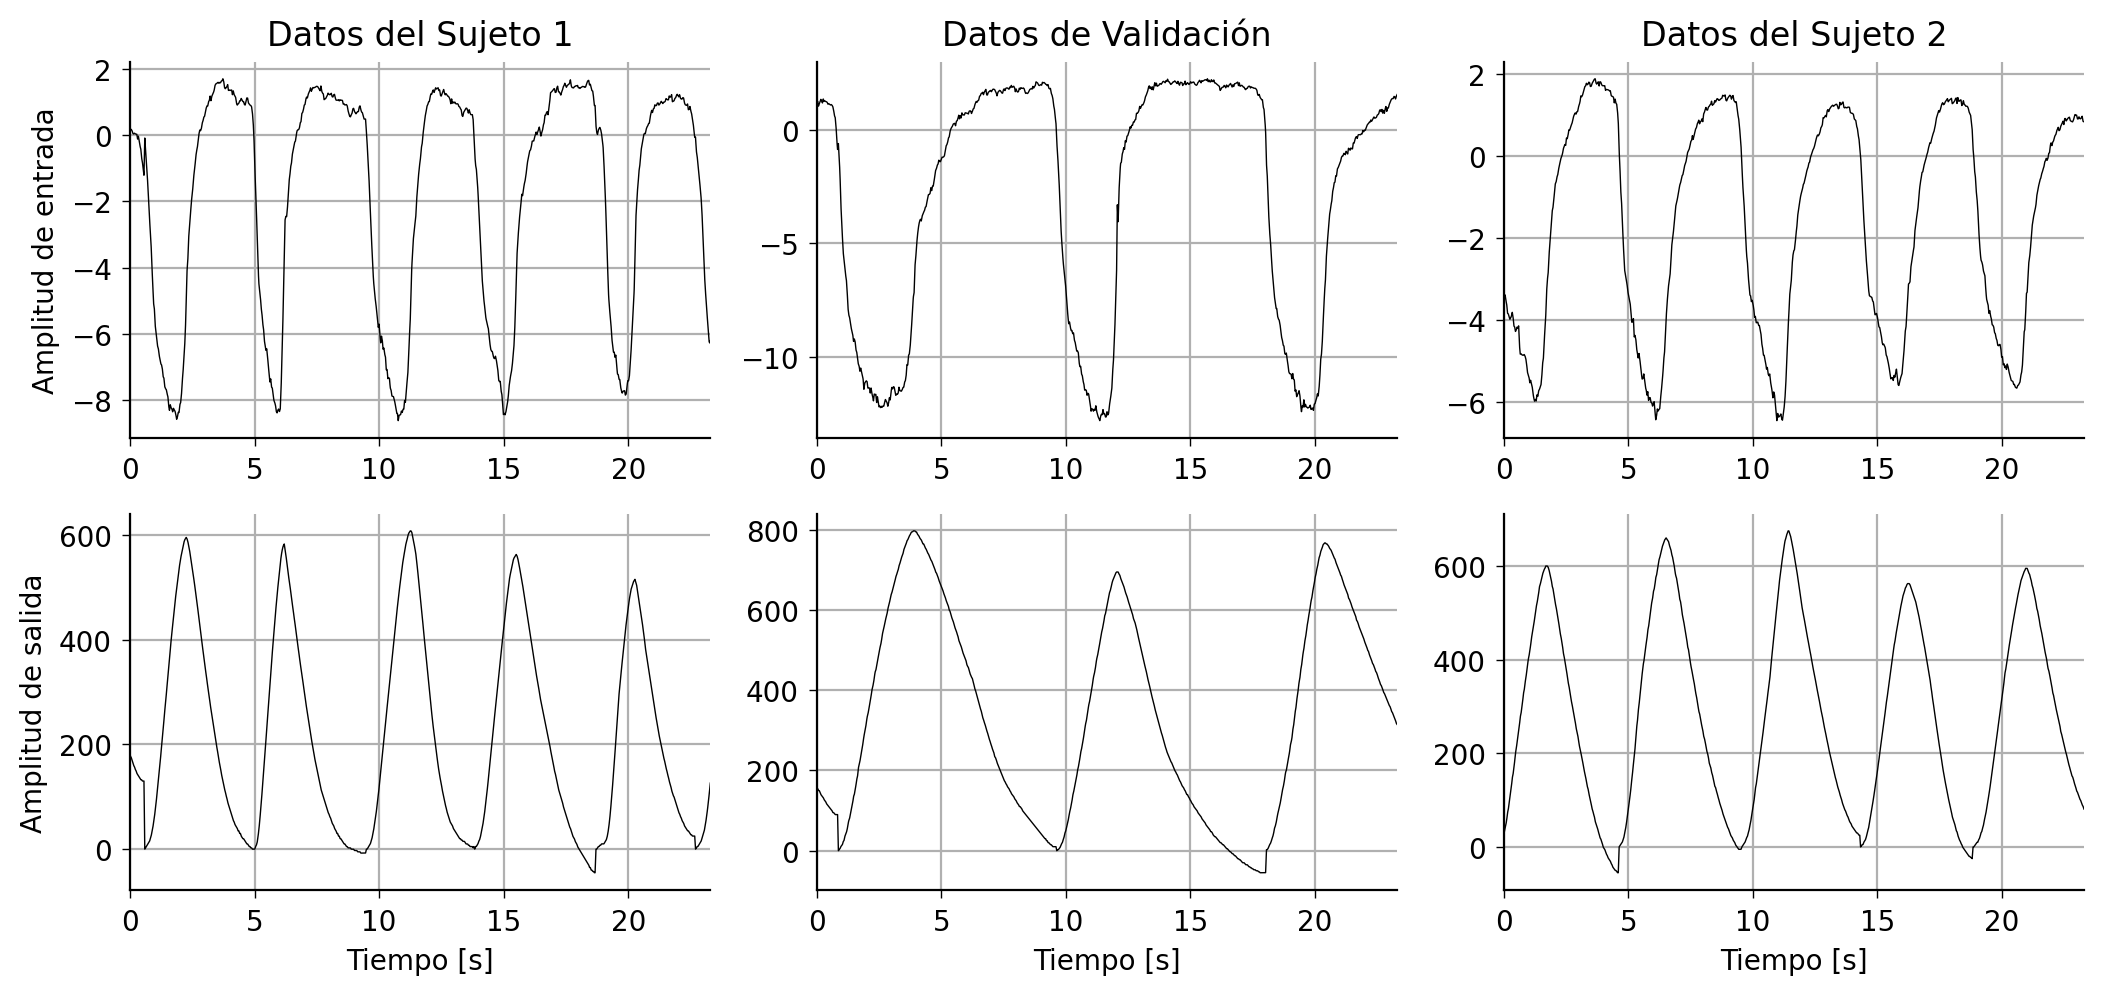

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(3.54*3, 2.54*2), dpi=200)

# --- Gráfico 1: Entrada de construcción ---
ax[0, 0].plot(t, u1, color='black', linewidth=0.5)
ax[0, 0].set_title('Datos del Sujeto 1')
ax[0, 0].set_ylabel('Amplitud de entrada')
ax[0, 0].set_xlim(0, np.max(t))
ax[0, 0].grid(True)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 2: Entrada de validación ---
ax[0, 1].plot(t, uv, color='black', linewidth=0.5)
ax[0, 1].set_title('Datos de Validación')
ax[0, 1].set_xlim(0, np.max(t))
ax[0, 1].grid(True)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 3: Entrada de sujeto 2 ---
ax[0, 2].plot(t, u2, color='black', linewidth=0.5)
ax[0, 2].set_title('Datos del Sujeto 2')
ax[0, 2].set_xlim(0, np.max(t))
ax[0, 2].grid(True)
ax[0, 2].spines['top'].set_visible(False)
ax[0, 2].spines['right'].set_visible(False)
ax[0, 2].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 4: Salida de construcción ---
ax[1, 0].plot(t, y1, color='black', linewidth=0.5)
ax[1, 0].set_ylabel('Amplitud de salida')
ax[1, 0].set_xlabel('Tiempo [s]')
ax[1, 0].set_xlim(0, np.max(t))
ax[1, 0].grid(True)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 5: Salida de validación ---
ax[1, 1].plot(t, yv, color='black', linewidth=0.5)
ax[1, 1].set_xlabel('Tiempo [s]')
ax[1, 1].set_xlim(0, np.max(t))
ax[1, 1].grid(True)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 6: Salida del sujeto 2 ---
ax[1, 2].plot(t, y2, color='black', linewidth=0.5)
ax[1, 2].set_xlabel('Tiempo [s]')
ax[1, 2].set_xlim(0, np.max(t))
ax[1, 2].grid(True)
ax[1, 2].spines['top'].set_visible(False)
ax[1, 2].spines['right'].set_visible(False)
ax[1, 2].tick_params(direction='out', length=3, width=0.5)

fig.tight_layout()
plt.show()

En el dominio del tiempo, se observa que las entradas y salidas no están exactamente alineadas en sus picos altos y bajos, lo que sugiere un retardo considerable que debe tenerse en cuenta en los módelos a proponer.

In [ ]:
N = len(y1)
freq = fftfreq(N, Ts)[:N//2]

yf = fft(y1)
uf = fft(u1)
yvf = fft(yv)
uvf = fft(uv)
y2f = fft(y2)
u2f = fft(u2)

# Magnitudes
yf_mag = 2.0/N * np.abs(yf[0:N//2])
yvf_mag = 2.0/N * np.abs(yvf[0:N//2])
y2f_mag = 2.0/N * np.abs(y2f[0:N//2])

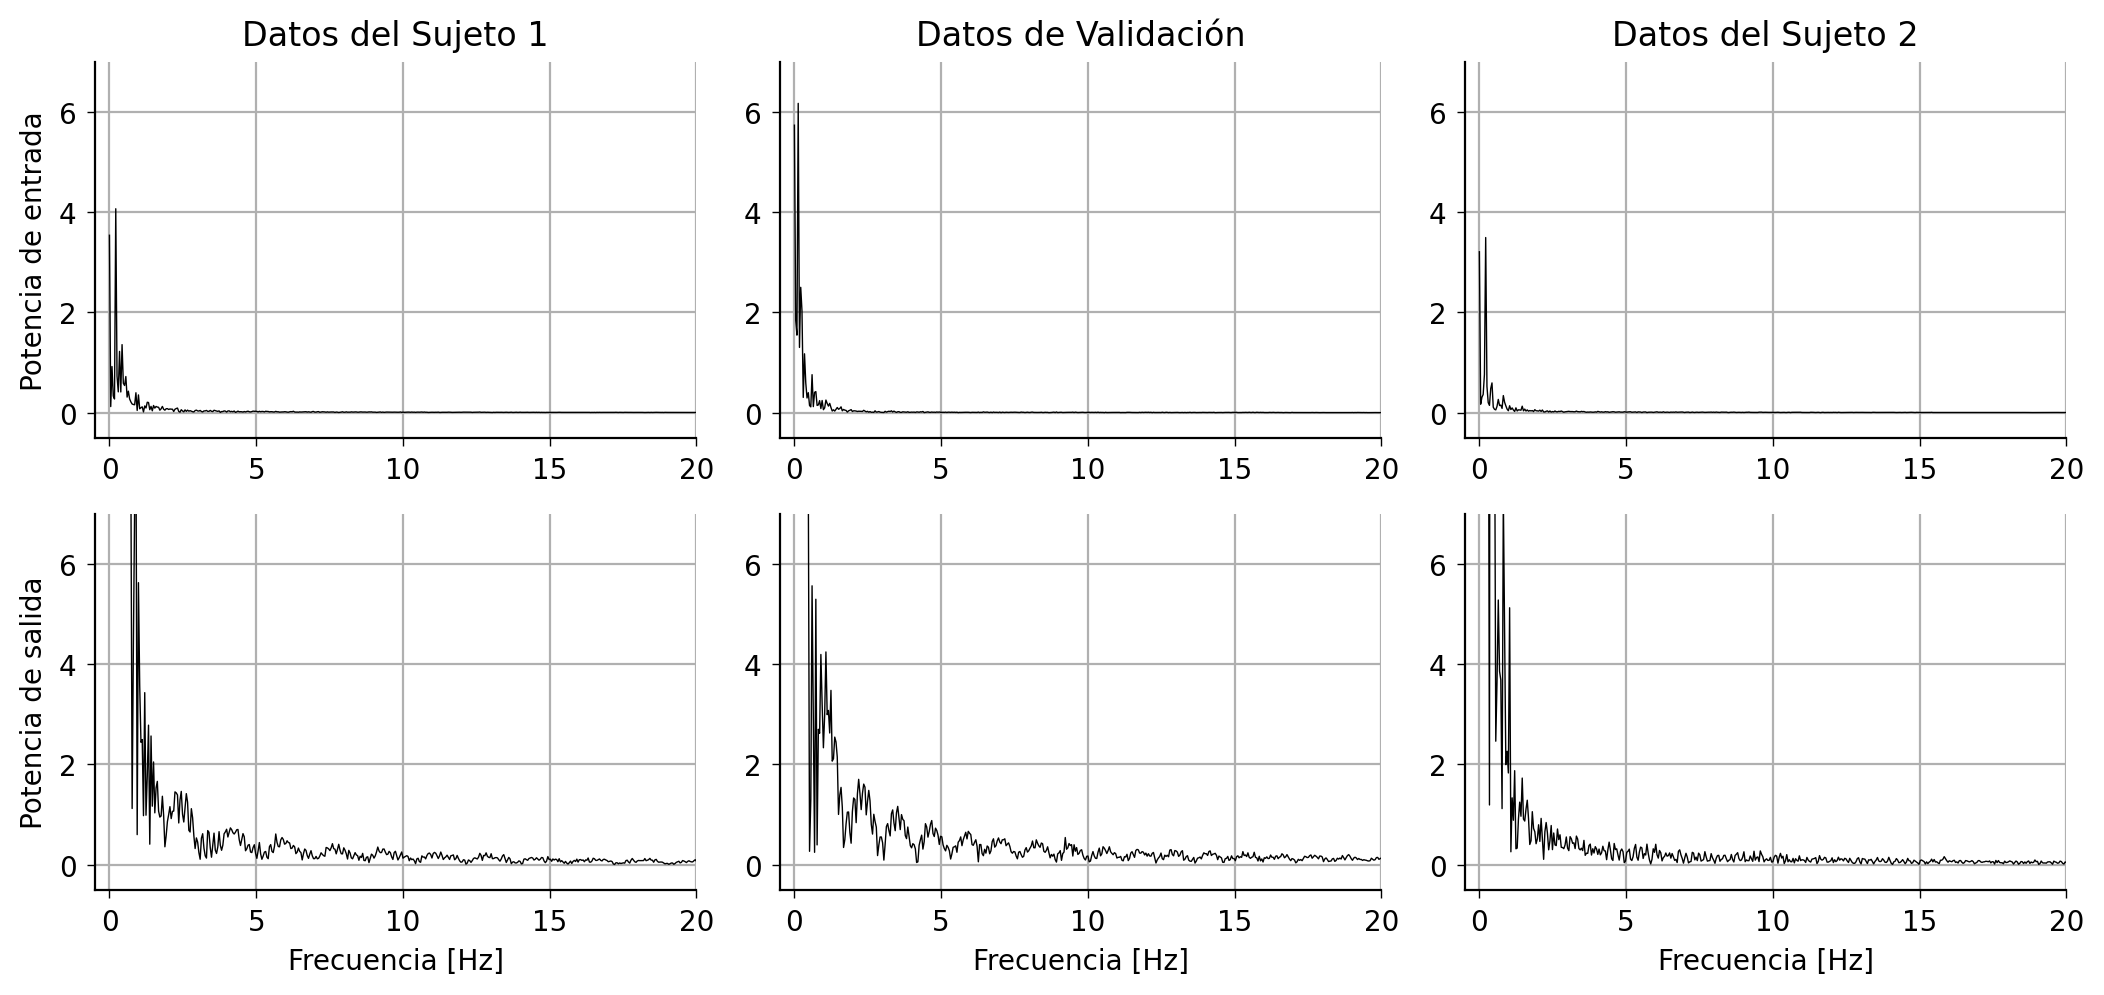

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(3.54*3, 2.54*2), dpi=200)

# --- Gráfico 1: Entrada de construcción ---
ax[0, 0].plot(freq, 2.0/N * np.abs(uf[0:N//2]), color='black', linewidth=0.5)
ax[0, 0].set_title('Datos del Sujeto 1')
ax[0, 0].set_ylabel('Potencia de entrada')
ax[0, 0].set_xlim(-0.5, 20)
ax[0, 0].set_ylim(-0.5, 7)
ax[0, 0].grid(True)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 2: Entrada de validación ---
ax[0, 1].plot(freq, 2.0/N * np.abs(uvf[0:N//2]), color='black', linewidth=0.5)
ax[0, 1].set_title('Datos de Validación')
ax[0, 1].set_xlim(-0.5, 20)
ax[0, 1].set_ylim(-0.5, 7)
ax[0, 1].grid(True)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 3: Entrada del Sujeto 2 ---
ax[0, 2].plot(freq, 2.0/N * np.abs(u2f[0:N//2]), color='black', linewidth=0.5)
ax[0, 2].set_title('Datos del Sujeto 2')
ax[0, 2].set_xlim(-0.5, 20)
ax[0, 2].set_ylim(-0.5, 7)
ax[0, 2].grid(True)
ax[0, 2].spines['top'].set_visible(False)
ax[0, 2].spines['right'].set_visible(False)
ax[0, 2].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 4: Salida de construcción ---
ax[1, 0].plot(freq, yf_mag, color='black', linewidth=0.5)
ax[1, 0].set_ylabel('Potencia de salida')
ax[1, 0].set_xlabel('Frecuencia [Hz]')
ax[1, 0].set_xlim(-0.5, 20)
ax[1, 0].set_ylim(-0.5, 7)
ax[1, 0].grid(True)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 5: Salida de validación ---
ax[1, 1].plot(freq, yvf_mag, color='black', linewidth=0.5)
ax[1, 1].set_xlabel('Frecuencia [Hz]')
ax[1, 1].set_xlim(-0.5, 20)
ax[1, 1].set_ylim(-0.5, 7)
ax[1, 1].grid(True)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 6: Salida del Sujeto 2 ---
ax[1, 2].plot(freq, y2f_mag, color='black', linewidth=0.5)
ax[1, 2].set_xlabel('Frecuencia [Hz]')
ax[1, 2].set_xlim(-0.5, 20)
ax[1, 2].set_ylim(-0.5, 7)
ax[1, 2].grid(True)
ax[1, 2].spines['top'].set_visible(False)
ax[1, 2].spines['right'].set_visible(False)
ax[1, 2].tick_params(direction='out', length=3, width=0.5)

fig.tight_layout()
plt.show()

Se observa en las salidas que el sistema añade componentes extra en varias frecuencias diferentes a las de la entrada, por lo que tiene un importantante componente de ruido. Esto justifica, posteriormente, la elección de un sistema que tenga en cuenta errores pasados en sus parámetros.

### Preprocesado.

La frecuencia respiratoria normal para adultos sin fiebre y sin patologias cardiacas o pulmonares se encuentra en promedio en 20 respiraciones por minuto (rpm), variando entre 18 a 22 rpm. En algunas personas con taquipnea severa se encuentran frecuencias mayores a 30rpm [1].

Esto concuerda con las señales de entrada, que como se evidencia por su transformada de Fourier, presentan la mayoría de su energía en bajas frecuencias. Sin embargo se observa como el sistema añade componentes en frecuencias más altas.

A partir de estos valores fisiológicos, se plantea un filtro pasabajas, con una frecuencia de corte en el doble del umbral de la taquiapnea severa i.e. 60rpm o 1Hz.

In [ ]:
def mfreqz(b,a,order,url, sup, nyq_rate = 1):

    """
    Gráfica la respuesta al impulso de un filtro en el dominio de la frecuencia.

    Parámetros:

        b: Valores del numerador de la función de transferencia (coeficientes del filtro).
        a: Valores del denominador de la función de transferencia (coeficientes del filtro).
        url: Url para guardar la figura graficada.
        sup: Titulo.
        order: Orden de filtro.
        nyq_rate = Frecuencia de nyquist
    """

    w,h = signal.freqz(b, a, worN=8000);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(3.54, 2.54*3), dpi=100);
    plt.suptitle(sup)

    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate, abs(h), linewidth=0.5, color='black');
    plt.ylabel('Magnitud');
    plt.title(r'Respuesta adimencional.');
    plt.xlim(0, 2)
    [xmin, xmax, ymin, ymax] = plt.axis();

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB, linewidth=0.5, color='black');
    plt.ylabel('Magnitud [dB]');
    plt.title(r'Respuesta en decibelios.');
    plt.xlim(0, 2)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase, linewidth=0.5, color='black');
    plt.ylabel('Fase [Radianes]');
    plt.xlabel(r'Frecuencia [Hz]');
    plt.title(r'Respuesta en fase.');
    plt.subplots_adjust(hspace=0.5);
    plt.xlim(0, 2)
    plt.grid(True)

    plt.tight_layout(pad=0.5)
    plt.show()

Se crea un filtro FIR, de manera que se asegura una fase lineal, de ventana Hann ($\Delta F = \frac{3,1}{Orden}$), asegurando una atenuación de hasta 100 veces en la banda de rechazo, con un orden resultante de:

$$
\Delta F = \frac{\text{Ancho de la banda de paso}}{\text{Frecuencia de muestreo}}
$$

$$
\therefore
$$

$$
\frac{3,1}{Orden} = \frac{1}{1000} \Rightarrow Orden = 3100
$$

In [ ]:
order   = int(3100 / 2) # La función filtfilt duplica el orden del filtro
Fs      = 1 / Ts
nyquist = Fs / 2 # frecuencia de nyquist

wn      = 1 / nyquist #frecuencia de corte normalizada respecto nyquist

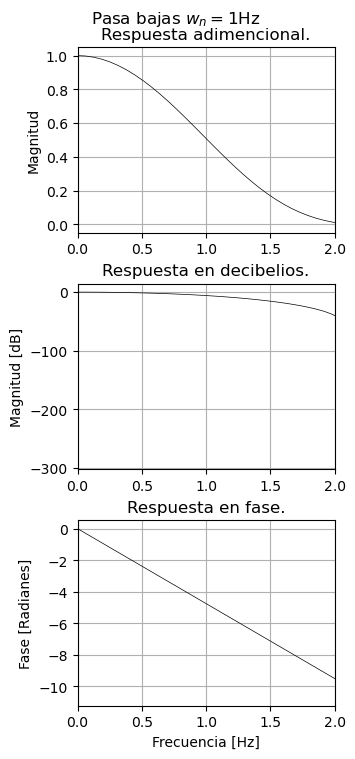

In [ ]:
b_low   = signal.firwin(order, wn, pass_zero = 'lowpass',window='hann') #filtro
a_low   = 1

# Aplicación del filtro
u1_low  = signal.filtfilt(b=b_low, a=a_low, x=u1)
y1_low  = signal.filtfilt(b=b_low, a=a_low, x=y1)

uv_low  = signal.filtfilt(b=b_low, a=a_low, x=uv)
yv_low  = signal.filtfilt(b=b_low, a=a_low, x=yv)

u2_low  = signal.filtfilt(b=b_low, a=a_low, x=u2)
y2_low  = signal.filtfilt(b=b_low, a=a_low, x=y2)

mfreqz(b=b_low,
       a=a_low,
       order=order,
       sup=r'Pasa bajas $w_n = 1$Hz',
       url=None,
       nyq_rate=nyquist)

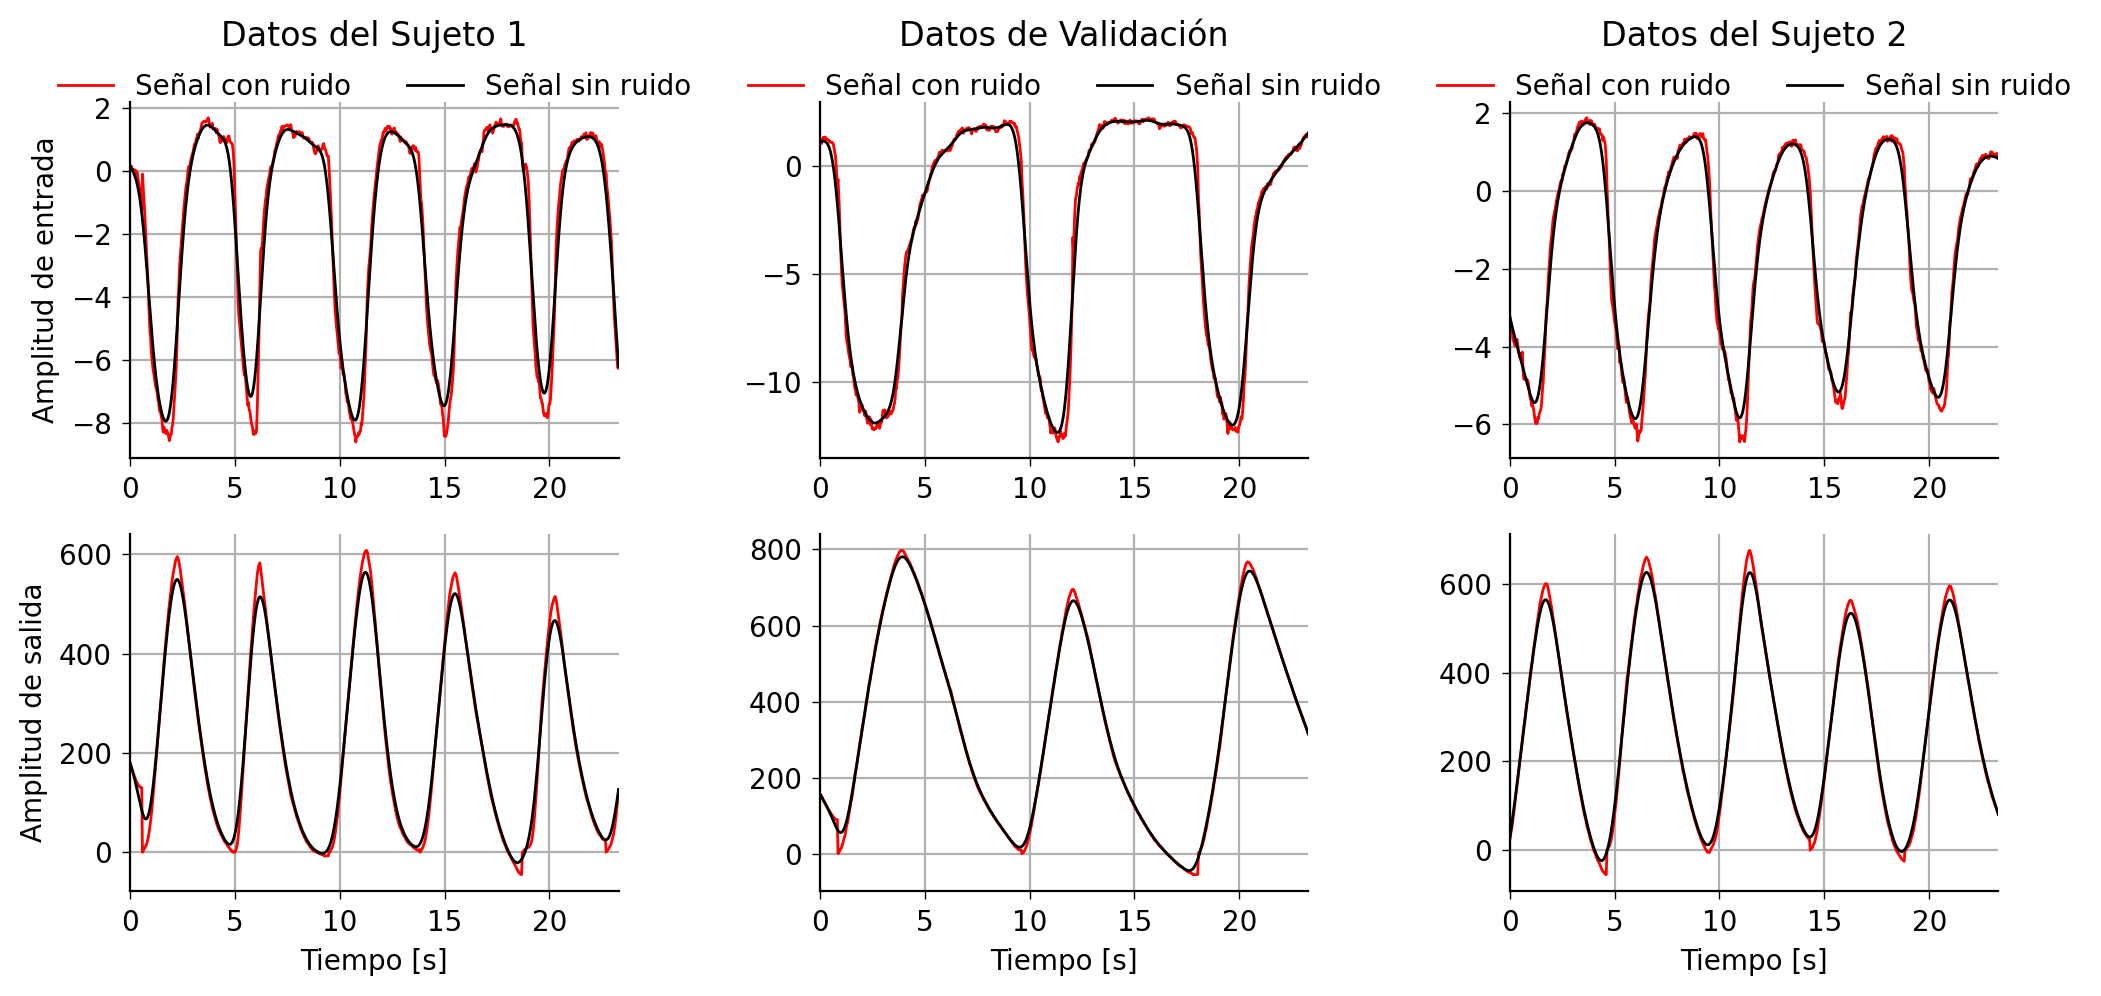

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(3.54*3, 2.54*2), dpi=200)

# --- Gráfico 1: Entrada de construcción ---
ax[0, 0].plot(t, u1, color='red', linewidth=1)
ax[0, 0].plot(t, u1_low, color='black', linewidth=1)
ax[0, 0].set_title('Datos del Sujeto 1', pad=20)
ax[0, 0].set_ylabel('Amplitud de entrada')
ax[0, 0].set_xlim(0, np.max(t))
ax[0, 0].grid(True)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(direction='out', length=3, width=0.5)
ax[0, 0].legend(['Señal con ruido', 'Señal sin ruido'],
                loc='upper center', bbox_to_anchor=(0.5, 1.15),
                ncol=2, frameon=False)

# --- Gráfico 2: Entrada de validación ---
ax[0, 1].plot(t, uv, color='red', linewidth=1)
ax[0, 1].plot(t, uv_low, color='black', linewidth=1)
ax[0, 1].set_title('Datos de Validación', pad=20)
ax[0, 1].set_xlim(0, np.max(t))
ax[0, 1].grid(True)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(direction='out', length=3, width=0.5)
ax[0, 1].legend(['Señal con ruido', 'Señal sin ruido'],
                loc='upper center', bbox_to_anchor=(0.5, 1.15),
                ncol=2, frameon=False)

# --- Gráfico 3: Entrada de sujeto 2 ---
ax[0, 2].plot(t, u2, color='red', linewidth=1)
ax[0, 2].plot(t, u2_low, color='black', linewidth=1)
ax[0, 2].set_title('Datos del Sujeto 2', pad=20)
ax[0, 2].set_xlim(0, np.max(t))
ax[0, 2].grid(True)
ax[0, 2].spines['top'].set_visible(False)
ax[0, 2].spines['right'].set_visible(False)
ax[0, 2].tick_params(direction='out', length=3, width=0.5)
ax[0, 2].legend(['Señal con ruido', 'Señal sin ruido'],
                loc='upper center', bbox_to_anchor=(0.5, 1.15),
                ncol=2, frameon=False)

# --- Gráfico 4: Salida de construcción ---
ax[1, 0].plot(t, y1, color='red', linewidth=1)
ax[1, 0].plot(t, y1_low, color='black', linewidth=1)
ax[1, 0].set_ylabel('Amplitud de salida')
ax[1, 0].set_xlabel('Tiempo [s]')
ax[1, 0].set_xlim(0, np.max(t))
ax[1, 0].grid(True)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 5: Salida de validación ---
ax[1, 1].plot(t, yv, color='red', linewidth=1)
ax[1, 1].plot(t, yv_low, color='black', linewidth=1)
ax[1, 1].set_xlabel('Tiempo [s]')
ax[1, 1].set_xlim(0, np.max(t))
ax[1, 1].grid(True)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(direction='out', length=3, width=0.5)

# --- Gráfico 6: Salida del sujeto 2 ---
ax[1, 2].plot(t, y2, color='red', linewidth=1)
ax[1, 2].plot(t, y2_low, color='black', linewidth=1)
ax[1, 2].set_xlabel('Tiempo [s]')
ax[1, 2].set_xlim(0, np.max(t))
ax[1, 2].grid(True)
ax[1, 2].spines['top'].set_visible(False)
ax[1, 2].spines['right'].set_visible(False)
ax[1, 2].tick_params(direction='out', length=3, width=0.5)

fig.tight_layout()
plt.show()

### Identificación del sistema

#### Box Jenkins (BJ).
$$ y(n) = \frac{B(z)}{F(z)}u(n-n_k) + \frac{C(z)}{D(z)}e(n) $$

**Elección de parámetros**

| Parámetro | Valor | Justificación |
| --------- | ----- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `nb`      | 3     | La salida responde lentamente a cambios abruptos de la entrada, lo que sugiere que la entrada pasada (más allá del retardo) sigue afectando al sistema. Un orden 2 permite capturar esa dinámica.              |
| `nf`      | 3     | La salida tiene una respuesta suavizada y progresiva, sin picos abruptos ni oscilaciones. Esto indica una dinámica estable que puede representarse con un polinomio de orden 2.                           |
| `nc`      | 2     | El ruido no tiene estructura aparente y parece ser ruido blanco puro. En este caso, basta un orden 1 para capturarlo sin sobreajustar.                                                                    |
| `nd`      | 2     | Dado que el ruido es aleatorio y no estructurado, la dinámica del modelo de error puede mantenerse en orden 1 para evitar sobreparametrización.                                                           |
| `nk`      | 0     | Luego de probar con distintos valores para el retraso, estos solo añadian valores nulos al polinomio, por lo que no se tendrá en cuenta. |


In [ ]:
# Parámetros del modelo Box-Jenkins
nb = [1]
nc = [1]
nd = [1]
nf = [1]
nk = [1]

error = y1 - y1_low
errorv = yv - yv_low
# Crear el modelo
model = bj(nb, nc, nd, nf, nk, u1_low, y1_low)

# Extraer los polinomios del modelo
B = model.B[0, 0]
C = model.C[0, 0]
D = model.D[0, 0]
F = model.F[0, 0]

print(f'B: {B}')
print(f'C: {C}')
print(f'D: {D}')
print(f'F: {F}\n')

# Crear los sistemas determinista y estocástico
system_input = dlti(B, F, dt=Ts)
system_noise = dlti(C, D, dt=Ts)

# Simular la respuesta determinista a la entrada de construcción
_, y_bj_sig = dlsim(system_input, u1_low)
y_bj_sig = y_bj_sig.flatten()

# Simular la respuesta estocástica al ruido
_, y_bj_noise = dlsim(system_noise, error)
y_bj_noise = y_bj_noise.flatten()

y_bj_model = y_bj_sig + y_bj_noise

# Validación: respuesta del modelo a la entrada uv
_, yv_bj_sig = dlsim(system_input, uv_low)
yv_bj_sig = yv_bj_sig.flatten()

yv_bj_model = (yv_bj_sig + y_bj_noise)

B: [  0.          11.49761997 -11.60678159]
C: [ 1.         -0.01009688]
D: [ 1.         -0.99988533]
F: [ 1.         -0.99870322]



c:\ProgramData\anaconda3\Lib\site-packages\scipy\signal\_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


#### Autoregresivo con media movil y entrada exógena (ARMAX).
$$ A(z)y(n) = B(z)u(n) + C(z)e(n) ⇒ y(n) = \frac{B(z)}{A(z)}u(n) + \frac{C(z)}{A(z)}e(n) $$

| Parámetro | Valor | Justificación |
| --------- | ----- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `na`      | 2     | La respuesta de la salida es lenta y suavizada, sin oscilaciones. Esto sugiere una dinámica propia del sistema (realimentación) de segundo orden, suficiente para capturar el comportamiento inercial. |
| `nb`      | 2     | Se observa que la entrada pasada tiene un efecto persistente sobre la salida, lo que indica que no solo el valor actual, sino varias muestras anteriores de entrada afectan al sistema.                |
| `nc`      | 2     | El ruido no tiene estructura aparente y parece ser ruido blanco puro. En este caso, basta un orden 2 para capturarlo sin sobreajustar.                                                                    |
| `nk`      | 0     | Luego de probar con distintos valores para el retraso, estos solo añadian valores nulos al polinomio, por lo que no se tendrá en cuenta. |


In [ ]:

# Parámetros del modelo ARMAX
na = [2]
nb = [2]
nc = [1]
nk = [1]

# Entrenar el modelo
model = armax(na[0], nb[0], nc[0], nk[0], u1_low, y1_low)

# Extraer polinomios del modelo
A = model.A[0, 0]
B = model.B[0, 0]
C = model.C[0, 0]

print(f"A: {A}")
print(f"B: {B}")
print(f"C: {C}\n")

# Crear sistema determinista (entrada u)
system_input = dlti(B, A, dt=Ts)
_, y_armax_sig = dlsim(system_input, u1_low)
y_armax_sig = y_armax_sig.flatten()

# Simular la respuesta estocástica al ruido
system_noise = dlti(C, A, dt=Ts)
_, y_armax_noise = dlsim(system_noise, error)
y_armax_noise = y_armax_noise.flatten()

y_armax_model = y_armax_sig + y_armax_noise

# Validación con entrada uv
_, yv_armax_sig = dlsim(system_input, uv_low)
yv_armax_sig = yv_armax_sig.flatten()

# Simular la respuesta estocástica al ruido
_, yv_armax_noise = dlsim(system_noise, errorv)
yv_armax_noise = yv_armax_noise.flatten()

yv_armax_model = yv_armax_sig + yv_armax_noise

C:\Users\Juan Pineda\AppData\Roaming\Python\Python312\site-packages\pysid\identification\solvers.py:67: LinAlgWarning: Ill-conditioned matrix (rcond=5.36152e-19): result may not be accurate.
  theta = solve(R1, R2)
C:\Users\Juan Pineda\AppData\Roaming\Python\Python312\site-packages\pysid\identification\pemethod.py:326: RuntimeWarning: invalid value encountered in subtract
  e -= lfilter(b, c, u[:,i], axis=0)
C:\Users\Juan Pineda\AppData\Roaming\Python\Python312\site-packages\pysid\identification\pemethod.py:326: RuntimeWarning: overflow encountered in subtract
  e -= lfilter(b, c, u[:,i], axis=0)


A: [ 1.         -1.99669256  0.9966943 ]
B: [  0.           9.13086929 -18.37154555   9.24047666]
C: [ 1.         -0.99588123]



### Autoregresivo con entrada exógena (ARX)

$$ A(z)y(n) = B(z)u(n) + e(n) ⇒ y(n) = \frac{B(z)}{A(z)}u(n) + e(n) $$

| Parámetro | Valor | Justificación                                                                                                                                                                                          |
| --------- | ----- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `na`      | 2     | La respuesta de la salida es lenta y suavizada, sin oscilaciones. Esto sugiere una dinámica propia del sistema (realimentación) de segundo orden, suficiente para capturar el comportamiento inercial. |
| `nb`      | 2     | Se observa que la entrada pasada tiene un efecto persistente sobre la salida, lo que indica que no solo el valor actual, sino varias muestras anteriores de entrada afectan al sistema.                |
| `nk`      | 0     | Se observó que el uso de retardos en BJ solo agregaba ceros al polinomio. Esto indica que el sistema podría tener un retardo despreciable.                      |


In [ ]:
from pysid import arx
from scipy.signal import dlti, dlsim
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo ARX
na = [3]
nb = [1]
nk = [1]

# Entrenar el modelo ARX
model = arx(na[0], nb[0], nk[0], u1_low, y1_low)

# Extraer coeficientes
A = model.A[0, 0]
B = model.B[0, 0]

print(f"A: {A}")
print(f"B: {B}\n")

# Crear sistema en espacio discreto
system_arx = dlti(B, A, dt=Ts)

# Simular la salida para la señal de entrenamiento
_, y_arx_sig = dlsim(system_arx, u1_low)
y_arx_sig = y_arx_sig.flatten()

system_noise = dlti(1, A, dt=Ts)
_, y_arx_noise = dlsim(system_noise, error)
y_arx_noise = y_arx_noise.flatten()

# Salida total
y_arx_model = y_arx_sig + y_arx_noise

# Validación con entrada uv
_, yv_arx_sig = dlsim(system_arx, uv_low)
yv_arx_sig = yv_arx_sig.flatten()

system_noise = dlti(1, A, dt=Ts)
_, yv_arx_noise = dlsim(system_noise, errorv)
yv_arx_noise = yv_arx_noise.flatten()

# Salida total
yv_arx_model = yv_arx_sig + yv_arx_noise


A: [ 1.         -2.99893166  2.99787201 -0.99894034]
B: [ 0.         -0.00011198  0.00011155]



#### Output Error (OE).
$$ y(n) = \frac{B(z)}{F(z)}u(n) + e(n) $$

| Parámetro | Valor | Justificación                                                                                                                                                                                       |
| --------- | ----- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `nb`      | 3     | La entrada tiene un efecto prolongado sobre la salida. Se observa una respuesta lenta pero clara al estímulo, lo cual indica que más de un término pasado de la entrada influye significativamente. |
| `nf`      | 3     | La salida es suave, sin oscilaciones, pero muestra una dinámica que requiere más de un polo para representarse correctamente. Un orden 2–3 en el denominador es adecuado para reflejar esa inercia. |
| `nk`      | 0     | Se observó que el uso de retardos en BJ solo agregaba ceros al polinomio. Esto indica que el sistema podría tener un retardo despreciable.                                     |


In [ ]:
# Parámetros del modelo OE
nb = [1]
nf = [3]
nk = [1]

# Entrenar el modelo
model = oe(nb[0], nf[0], nk[0], u1_low, y1_low)

# Extraer polinomios
B = model.B[0, 0]
F = model.F[0, 0]

print(f"B: {B}")
print(f"F: {F}\n")

# Crear sistema determinista
system_oe = dlti(B, F, dt=Ts)

# Simular la salida del modelo (entrenamiento)
_, y_oe_sig = dlsim(system_oe, u1_low)
y_oe_sig = y_oe_sig.flatten()
y_oe_model = y_oe_sig

# Validación con entrada uv
_, yv_oe_sig = dlsim(system_oe, uv_low)
yv_oe_sig = yv_oe_sig.flatten()
yv_oe_model = yv_oe_sig


B: [ 0.         -0.00011983  0.00011938]
F: [ 1.         -2.99893166  2.99787201 -0.99894034]



### Comparación

In [ ]:
def rmse(y_real, y_model):
    """
    Calcula el Error Cuadrático Medio entre dos señales.

    Parámetros:
        y_real : array-like
            Señal de referencia (real o deseada).
        y_model : array-like
            Señal estimada o modelada.

    Retorna:
        float : Error cuadrático medio.
    """
    y_real = np.asarray(y_real)
    y_model = np.asarray(y_model)

    return np.mean(np.sqrt((y_real - y_model) ** 2))

def fit_score(y_real, y_model):
    y_real = np.asarray(y_real)
    y_model = np.asarray(y_model)
    num = np.linalg.norm(y_real - y_model)
    den = np.linalg.norm(y_real - np.mean(y_real))
    return 100 * (1 - num / den)

Raiz del error cuadrático medio OE: 66.662410379122
Raiz del error cuadrático medio ARX: 1780088184.3762584
Raiz del error cuadrático medio ARMAX: 9620.229823617843
Raiz del error cuadrático medio BJ: 7281.504438803995

Fit OE: 55.26293151281239
Fit ARX: -1213294735.9681778
Fit ARMAX: -6441.555917006755
Fit BJ: -4964.778109778337


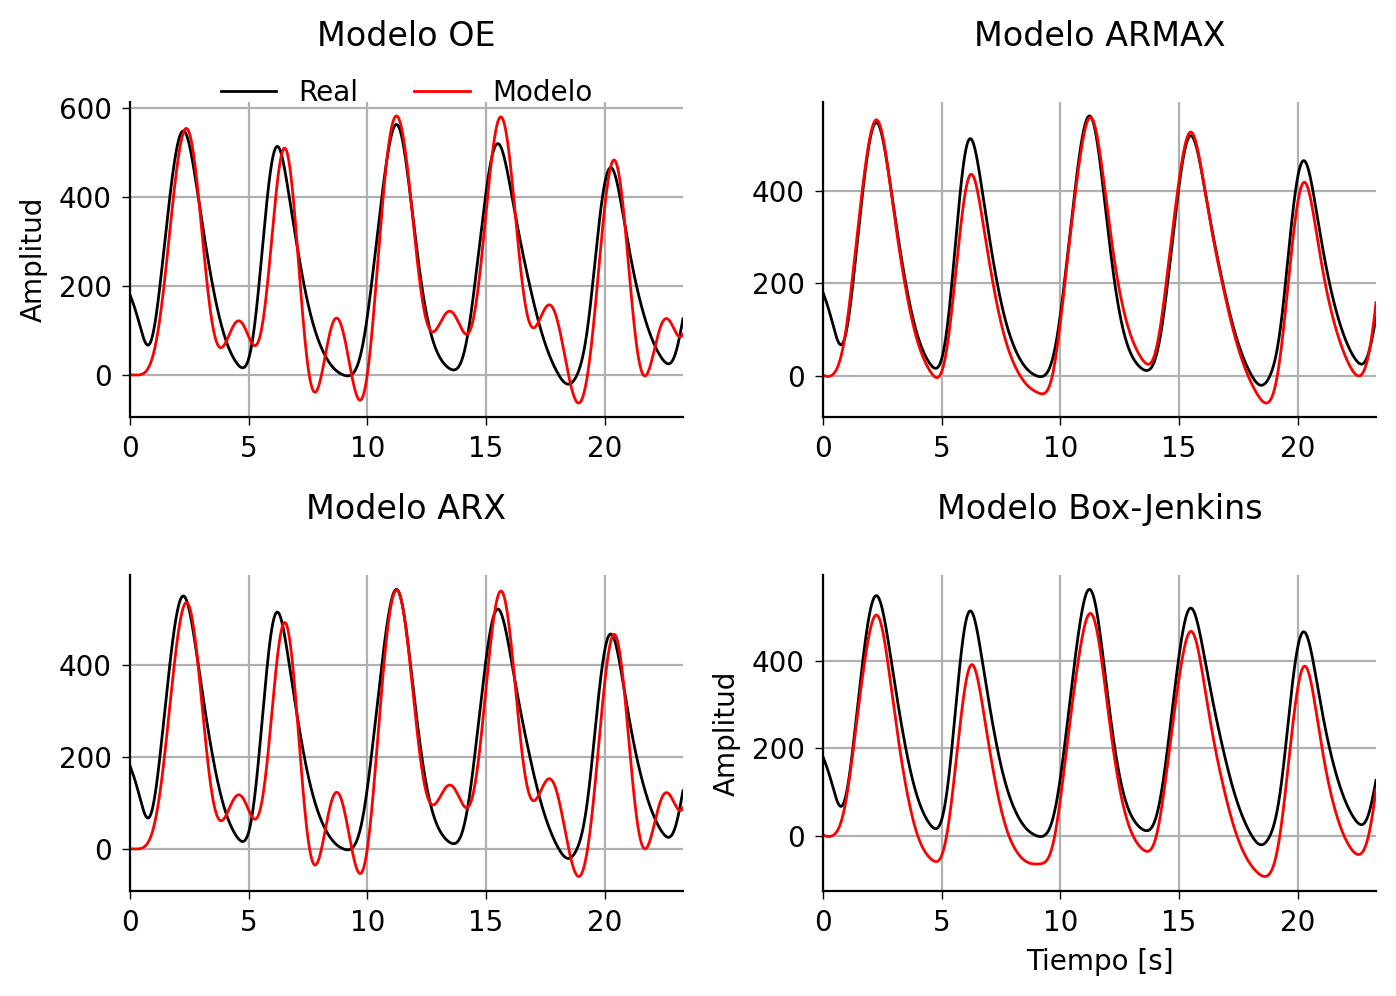

In [ ]:
error_oe = rmse(y1_low, y_oe_model)
error_arx = rmse(y1_low, y_arx_model)
error_armax = rmse(y1_low, y_armax_model)
error_bj = rmse(y1_low, y_bj_model)

fit_oe = fit_score(y1_low, y_oe_model)
fit_arx = fit_score(y1_low, y_arx_model)
fit_armax = fit_score(y1_low, y_armax_model)
fit_bj = fit_score(y1_low, y_bj_model)

print("Raiz del error cuadrático medio OE:", error_oe)
print("Raiz del error cuadrático medio ARX:", error_arx)
print("Raiz del error cuadrático medio ARMAX:", error_armax)
print("Raiz del error cuadrático medio BJ:", error_bj)

print("\nFit OE:", fit_oe)
print("Fit ARX:", fit_arx)
print("Fit ARMAX:", fit_armax)
print("Fit BJ:", fit_bj)

fig, ax = plt.subplots(2, 2, figsize=(3.54*2, 2.54*2), dpi=200)

# --- Modelo OE ---
ax[0, 0].plot(t, y1_low, color='black', linewidth=1)
ax[0, 0].plot(t, y_oe_model, color='red', linewidth=1)
ax[0, 0].set_title('Modelo OE', pad=20)
ax[0, 0].set_ylabel('Amplitud')
ax[0, 0].set_xlim(0, np.max(t))
ax[0, 0].grid(True)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(direction='out', length=3, width=0.5)
ax[0, 0].legend(['Real', 'Modelo'], loc='upper center',
                bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)

# --- Modelo ARMAX ---
ax[0, 1].plot(t, y1_low, color='black', linewidth=1)
ax[0, 1].plot(t, y_armax_sig, color='red', linewidth=1)
ax[0, 1].set_title('Modelo ARMAX', pad=20)
ax[0, 1].set_xlim(0, np.max(t))
ax[0, 1].grid(True)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(direction='out', length=3, width=0.5)

# --- Modelo ARX ---
ax[1, 0].plot(t, y1_low, color='black', linewidth=1)
ax[1, 0].plot(t, y_arx_sig, color='red', linewidth=1)
ax[1, 0].set_title('Modelo ARX', pad=20)
ax[1, 0].set_xlim(0, np.max(t))
ax[1, 0].grid(True)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(direction='out', length=3, width=0.5)

# --- Modelo BJ ---
ax[1, 1].plot(t, y1_low, color='black', linewidth=1)
ax[1, 1].plot(t, y_bj_sig, color='red', linewidth=1)
ax[1, 1].set_title('Modelo Box-Jenkins', pad=20)
ax[1, 1].set_ylabel('Amplitud')
ax[1, 1].set_xlabel('Tiempo [s]')
ax[1, 1].set_xlim(0, np.max(t))
ax[1, 1].grid(True)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(direction='out', length=3, width=0.5)

fig.tight_layout()
plt.show()


Raiz del error cuadrático medio OE: 114.82574373934784
Raiz del error cuadrático medio ARX: 644501962.0327542
Raiz del error cuadrático medio ARMAX: 6358.893953130881
Raiz del error cuadrático medio BJ: 7284.812430972937

Fit OE: 49.76150701224127
Fit ARX: -351326620.0680326
Fit ARMAX: -2962.914571390873
Fit BJ: -3462.85788021794


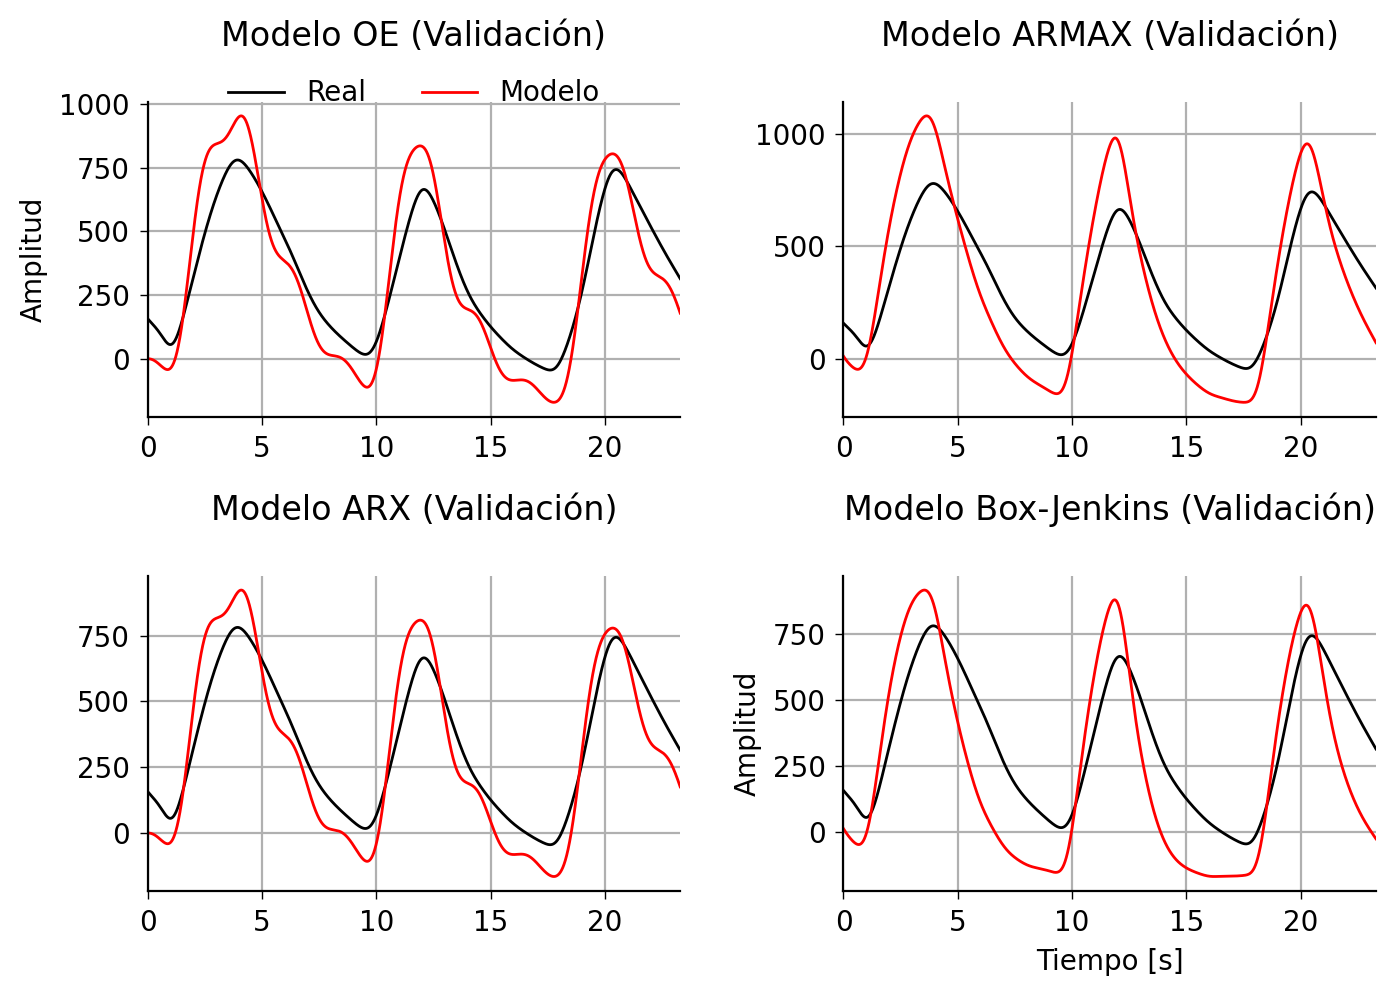

In [ ]:
error_oe = rmse(yv_low, yv_oe_model)
error_arx = rmse(yv_low, yv_arx_model)
error_armax = rmse(yv_low, yv_armax_model)
error_bj = rmse(yv_low, yv_bj_model)

fit_oe = fit_score(yv_low, yv_oe_model)
fit_arx = fit_score(yv_low, yv_arx_model)
fit_armax = fit_score(yv_low, yv_armax_model)
fit_bj = fit_score(yv_low, yv_bj_model)

print("Raiz del error cuadrático medio OE:", error_oe)
print("Raiz del error cuadrático medio ARX:", error_arx)
print("Raiz del error cuadrático medio ARMAX:", error_armax)
print("Raiz del error cuadrático medio BJ:", error_bj)

print("\nFit OE:", fit_oe)
print("Fit ARX:", fit_arx)
print("Fit ARMAX:", fit_armax)
print("Fit BJ:", fit_bj)

fig, ax = plt.subplots(2, 2, figsize=(3.54*2, 2.54*2), dpi=200)

# --- Modelo OE ---
ax[0, 0].plot(t, yv_low, color='black', linewidth=1)
ax[0, 0].plot(t, yv_oe_model, color='red', linewidth=1)
ax[0, 0].set_title('Modelo OE (Validación)', pad=20)
ax[0, 0].set_ylabel('Amplitud')
ax[0, 0].set_xlim(0, np.max(t))
ax[0, 0].grid(True)
ax[0, 0].spines['top'].set_visible(False)
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].tick_params(direction='out', length=3, width=0.5)
ax[0, 0].legend(['Real', 'Modelo'], loc='upper center',
                bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)

# --- Modelo ARMAX ---
ax[0, 1].plot(t, yv_low, color='black', linewidth=1)
ax[0, 1].plot(t, yv_armax_sig, color='red', linewidth=1)
ax[0, 1].set_title('Modelo ARMAX (Validación)', pad=20)
ax[0, 1].set_xlim(0, np.max(t))
ax[0, 1].grid(True)
ax[0, 1].spines['top'].set_visible(False)
ax[0, 1].spines['right'].set_visible(False)
ax[0, 1].tick_params(direction='out', length=3, width=0.5)

# --- Modelo ARX ---
ax[1, 0].plot(t, yv_low, color='black', linewidth=1)
ax[1, 0].plot(t, yv_arx_sig, color='red', linewidth=1)
ax[1, 0].set_title('Modelo ARX (Validación)', pad=20)
ax[1, 0].set_xlim(0, np.max(t))
ax[1, 0].grid(True)
ax[1, 0].spines['top'].set_visible(False)
ax[1, 0].spines['right'].set_visible(False)
ax[1, 0].tick_params(direction='out', length=3, width=0.5)

# --- Modelo BJ ---
ax[1, 1].plot(t, yv_low, color='black', linewidth=1)
ax[1, 1].plot(t, yv_bj_sig, color='red', linewidth=1)
ax[1, 1].set_title('Modelo Box-Jenkins (Validación)', pad=20)
ax[1, 1].set_ylabel('Amplitud')
ax[1, 1].set_xlabel('Tiempo [s]')
ax[1, 1].set_xlim(0, np.max(t))
ax[1, 1].grid(True)
ax[1, 1].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].tick_params(direction='out', length=3, width=0.5)

fig.tight_layout()
plt.show()

Se observa que el modelo que mejor se ajusta es el OE

$$ y(z) = \frac{-0.00011198 z^{-1} + 0.00011155 z^{-2}}{1  -2.99893166 z^{-1} +2.99787201 z^{-2} -0.99894034 z^{-3}}u(z-1) + e(n) $$


F: [ 1.         -2.99893166  2.99787201 -0.99894034]

B: [ 0.         -0.00011198  0.00011155]

Los modelos presentan un mejor comportamiento al considerar solo la parte determinista. Esto se sustenta en el hecho de que el ruido del sistema es demasiado complejo y dificil de simular, por lo que presenta mejores resultados tras ser filtrado que al intentar tenerlo en cuenta en el sistema.

## 2. Análisis de sensibilidad.
---
Una vez encontrado el modelo que describe el sistema para el sujeto 1, realice un análisis de sensibilidad de los parámetros contenidos y seleccione los 4 parámetros más sensibles. Justifique su elección.

In [ ]:
def fn_sys(params, t, u):
    A = params[0]
    B = params[1]
    C = params[2]
    D = params[3]
    E = params[4]
    F = params[5]

    num = [A, B]
    den = [C, D, E, F]

    system = TransferFunction(num, den)
    _, y_tf, _ = lsim(system, U=u, T=t)
    return y_tf

In [ ]:
b2 = -0.00011198
b3 = 0.00011155
a1 = 1
a2 = -2.99893166
a3 = 2.99787201
a4 = -0.99894034

Np = 6 # Número de parámetros
pararef = np.array([b2, b3, a1, a2, a3, a4]) # Parámetros
para = np.zeros((len(pararef), 1)) # Se inicializa el arreglo de parámetros. Tiene 6 filas y 1 columna
step = 5 # Paso para realizar las iteraciones.
para_change = np.arange(-50, 51, step) # El cambio del parámetro va de -50% hasta 50%
num_steps = int(2*(50/step)+1) #len(para_change)

J = np.zeros((num_steps, Np)) #Matriz donde cada columna es el error respecto a cada parámetro.

for i in range(Np): #Ahora se empieza a llenar la matriz (columna)
    for k in range(num_steps): #Llenas filas)
        para = pararef.copy()
        para[i] = pararef[i] * (1 + para_change[k] / 100)
        if para_change[k] == 0: #Si el cambio en el parámetro es 0
            J[k, i] = 0 #Se coloca que el error en esa columna es 0
        else:
            ypred = fn_sys(para, t, u1_low) #fn_sys le entran los parámetros
            e = ypred - y1
            J[k, i] = np.sum(e **2) #Se calcula el error

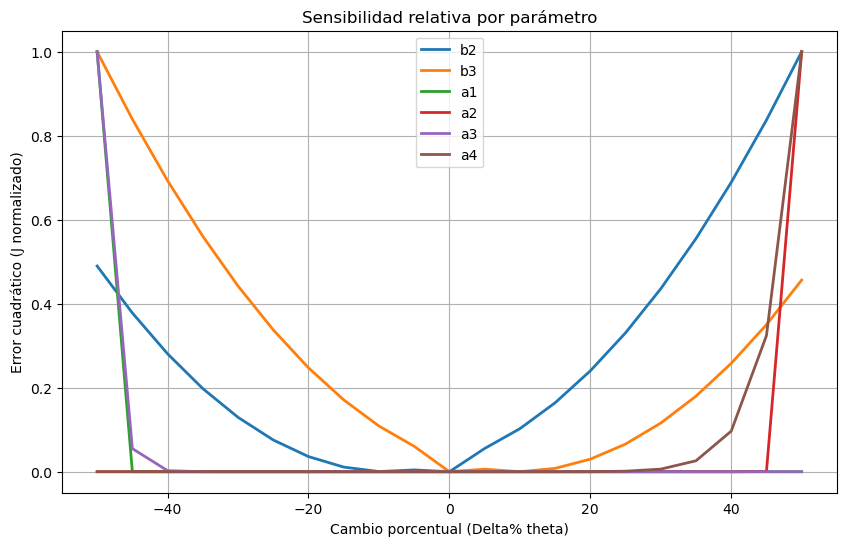

In [ ]:
plt.figure(figsize=(10,6))
labels = ['b2', 'b3', 'a1', 'a2', 'a3', 'a4']
J_normalized = J / np.max(J, axis=0)  # Normaliza cada columna individualmente

for i in range(Np):
    plt.plot(para_change, J_normalized[:, i], label=labels[i], linewidth=2)

plt.legend()
plt.xlabel('Cambio porcentual (Delta% theta)')
plt.ylabel('Error cuadrático (J normalizado)')
plt.title('Sensibilidad relativa por parámetro')
plt.grid(True)


## 3. Optimización.
---
Con los cuatro parámetros encontrados en el ítem anterior, encuentre los valores óptimos que permiten ajustar el modelo al sujeto 2. Sustente la elección de los valores semilla y reporte la expresión final del modelo para este sujeto con los valores óptimos encontrados.


In [ ]:
def fn_coste(theta):
    global t, u2_low, y2_low

    b2 = theta[0]
    b3 = theta[1]
    a1 = 1
    a2 = -2.99893166
    a3 = theta[2]
    a4 = theta[3]

    #Construcción del sistema
    num = [b2, b3]
    den = [a1, a2, a3, a4] # Se tienen 6 parámetros.

    system = dlti(num, den, dt=Ts)

    #Simulación de la salida
    _, ypred = dlsim(system, u2_low)
    ypred = ypred.flatten()

    #Cálculo del error cuadrático
    e = y2_low - ypred
    J = np.sum(np.sqrt(e**2))
    return J

In [ ]:
#Valores iniciales (semilla)

a1, a2, a3, a4 = [ 1,         -2.99893166,  2.99787201, -0.99894034]
b2, b3 = [-0.00011198,  0.00011155]

theta_init = np.array([b2, b3, a3, a4])  # Valores base para los parámetros

#Le entrego la función de coste a minimizar a la función minimize.
res = minimize(fn_coste, theta_init, method = 'Nelder-Mead', options={'disp': True, 'maxiter': 500})

C:\Users\Juan Pineda\AppData\Local\Temp\ipykernel_25060\131920096.py:23: RuntimeWarning: overflow encountered in square
  J = np.sum(np.sqrt(e**2))


Optimization terminated successfully.
         Current function value: 705014.672871
         Iterations: 390
         Function evaluations: 782
5118940.239720199


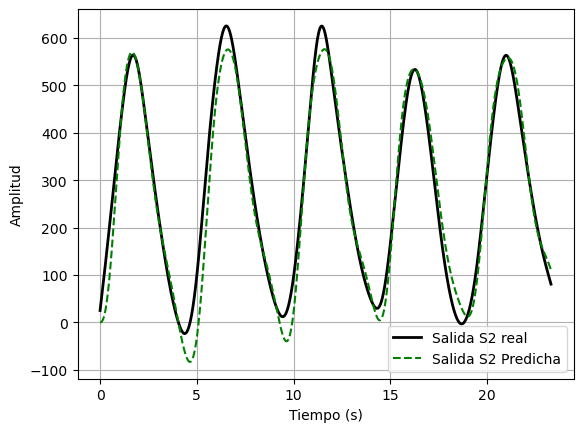

In [ ]:
num = [res.x[0], res.x[1]]
den = [1,-2.99893166,res.x[2],res.x[3]]

system_opt = dlti(num, den, dt=Ts)

_, ypred = dlsim(system_opt, u2_low)
ypred = ypred.flatten()


plt.plot(t, y2_low, 'k', label = 'Salida S2 real', linewidth = 2)
plt.plot(t, ypred, 'green', label = 'Salida S2 Predicha', linestyle = '--')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid()

In [ ]:
print("\nParámetros del modelo óptimo:")
print(f"b2: {res.x[0]}")
print(f"b3: {res.x[1]}")
print(f"a1: 1 (fijo)")
print(f"a2: -2.99893166 (fijo)")
print(f"a3: {res.x[2]}")
print(f"a4: {res.x[3]}\n")


Parámetros del modelo óptimo:
b2: -0.00011243521640269004
b3: 0.0001117191592006292
a1: 1 (fijo)
a2: -2.99893166 (fijo)
a3: 2.9978720308713562
a4: -0.9989403667930369



## 4. Análisis en tiempo y frecuencia.
---
Realice un análisis en los dominios temporales y frecuenciales del sistema encontrado, tanto con los parámetros del sujeto 1 como del sujeto 2. Realice un análisis de los resultados dando una explicación fisiológica de las diferencias encontradas entre ambos sujetos e interprete los parámetros del modelo tratando de darles un sentido fisiológico.

### Comparación de respuesta ante el impulso

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, dimpulse

# Parámetros del modelo para el sujeto 1
b2 = -0.00011198
b3 = 0.00011155
a1 = 1
a2 = -2.99893166
a3 = 2.99787201
a4 = -0.99894034

num1 = [b2, b3]              # Numerador
den1 = [a1, a2, a3, a4]      # Denominador

system_s1 = dlti(num1, den1, dt=Ts)


# Parámetros del modelo para el sujeto 2
b2 = -0.00011243521640269004
b3 = 0.0001117191592006292
a1 = 1
a2 = -2.99893166
a3 = 2.9978720308713562
a4 = -0.9989403667930369

num2 = [b2, b3]              # Numerador
den2 = [a1, a2, a3, a4]      # Denominador

system_s2 = dlti(num2, den2, dt=Ts)

# Calcular la respuesta al impulso
t1, h1 = dimpulse(system_s1)
t2, h2 = dimpulse(system_s2)

h1 = np.squeeze(h1)
h2 = np.squeeze(h2)

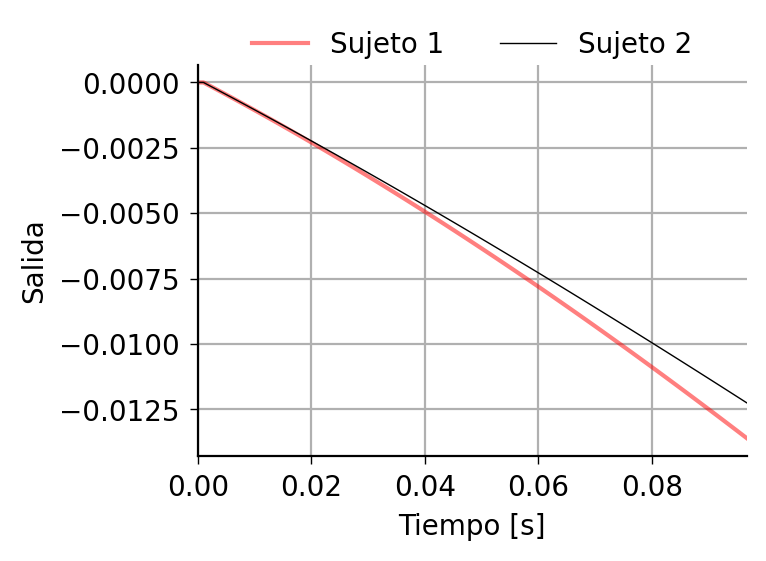

In [36]:
# Graficar
plt.figure(figsize=(3.54, 2.54), dpi=200)
plt.plot(t2, h2, label='Sistema 2', color='red', alpha=0.5)
plt.plot(t1, h1, label='Sistema 1', color='black', linewidth=0.5)
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.xlim(0, np.max(t1))
plt.grid(True)
plt.legend(['Sujeto 2', 'Sujeto 1'], loc='upper center',
                bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

plt.show()

### Comparación de diagramas de Bode.

In [ ]:
# Obtener la respuesta en frecuencia con freqz
w, h1 = freqz(num1, den1, worN=512, whole=False)  # Sistema 1
_, h2 = freqz(num2, den2, worN=512, whole=False)  # Sistema 2

# Convertir la frecuencia digital a frecuencia normalizada (0 a π rad/muestra)
frequencies = w / np.pi  # Normalizada

# Magnitud en dB y fase en grados
mag1 = 20 * np.log10(np.abs(h1))
phase1 = np.angle(h1, deg=True)

mag2 = 20 * np.log10(np.abs(h2))
phase2 = np.angle(h2, deg=True)

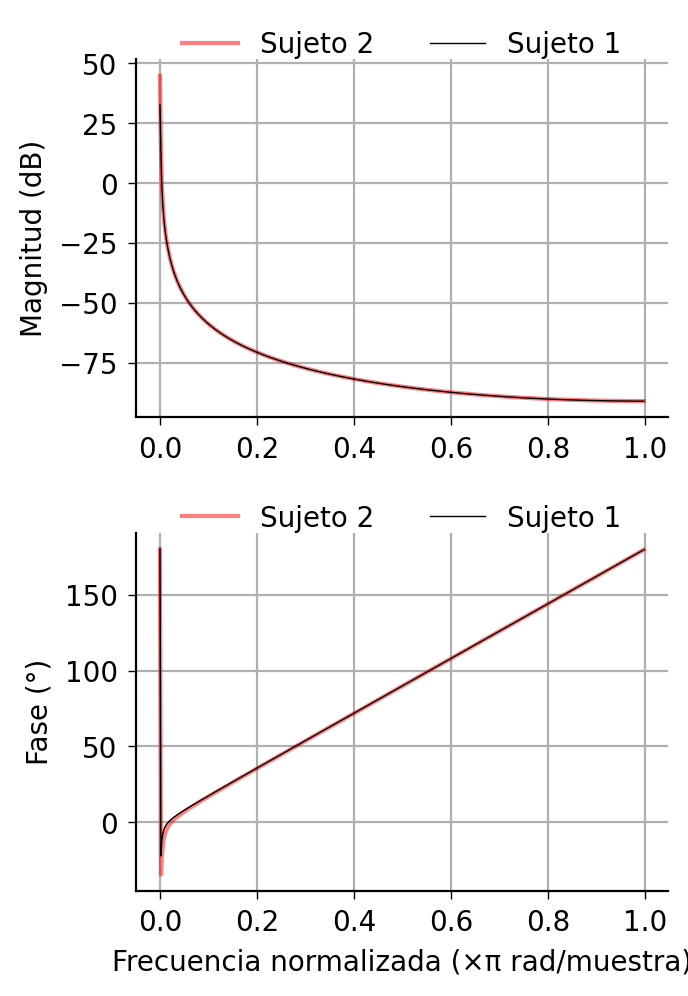

In [37]:
# Graficar diagrama de Bode
plt.figure(figsize=(3.54, 2.54*2), dpi=200)

# Magnitud
plt.subplot(2, 1, 1)
plt.plot(frequencies, mag2, color='red', alpha=0.5)
plt.plot(frequencies, mag1, color='black', linewidth=0.5)
plt.ylabel('Magnitud (dB)')
plt.grid(True)
plt.legend(['Sujeto 2', 'Sujeto 1'], loc='upper center',
                bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

# Fase
plt.subplot(2, 1, 2)
plt.plot(frequencies, phase2, color='red', alpha=0.5)
plt.plot(frequencies, phase1, color='black', linewidth=0.5)
plt.xlabel('Frecuencia normalizada (×π rad/muestra)')
plt.ylabel('Fase (°)')
plt.grid(True)
plt.legend(['Sujeto 2', 'Sujeto 1'], loc='upper center',
                bbox_to_anchor=(0.5, 1.15), ncol=2, frameon=False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(direction='out', length=3, width=0.5)

plt.tight_layout()
plt.show()

# Referencias

[1] McGee S. Respiratory rate and abnormal breathing patterns. In: McGee S, ed. Evidence-Based Physical Diagnosis. 5th ed. Philadelphia, PA: Elsevier; 2022:chap 19.